In [61]:
#Following youtube leaason https://www.youtube.com/watch?v=hOLSGMEEwlI
# Predict Stock Prices Using Machine Learning and Python
# Data are here https://www.kaggle.com/jainshukal/netflix-stock-price

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#Load the data
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX (3).csv


In [63]:
#Store the data into dataframe
df= pd.read_csv('NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [64]:
# # Get the number of traiding days

df.shape

(1007, 7)

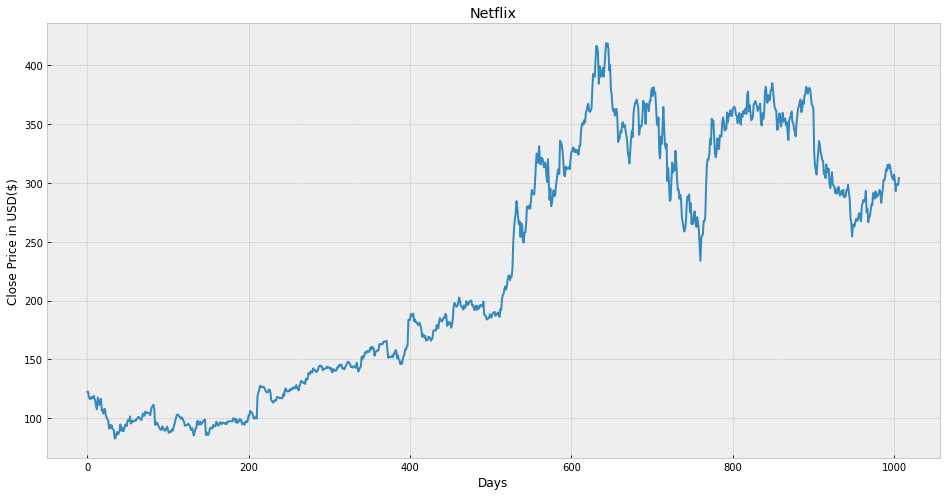

In [65]:
#Visualize the close price data

plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price in USD($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
# get the close price
df = df[['Close']]
df.head(10)

In [79]:
# create a variable to predict 'x' days out into the future

future_days=50
#create a new column (target) shifted 'x' units/days up
df['Prediction']= df[['Close']].shift(-future_days)
df.head(5)


,Close,Prediction
0,122.639999,98.300003
1,122.510002,97.610001
2,118.019997,97.930000
3,116.629997,101.580002
4,116.239998,95.489998


In [80]:
df.tail(5)

,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [81]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)
#


[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [82]:
# Create the target data set (x) and comvert it to a numpy array
# and get all of the target values except last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 98.300003  97.610001  97.93     101.580002  95.489998  96.230003
  98.        97.360001  97.660004  98.129997  97.860001  99.349998
  99.720001 101.120003 101.059998  99.839996  99.589996  98.360001
 101.209999 104.129997 102.190002 102.230003 105.699997 104.349998
 104.940002 104.830002 104.449997 103.809998 102.68     106.980003
 109.650002 110.419998 111.510002 108.400002  94.339996  96.769997
  94.980003  95.900002  93.559998  92.43      91.040001  90.279999
  90.029999  93.110001  91.540001  90.790001  89.370003  90.839996
  90.540001  92.889999  90.019997  87.739998  87.879997  89.120003
  88.629997  90.5       89.550003  92.489998  94.889999  97.889999
 100.199997 102.809998 103.300003 102.57     101.510002 101.25
  99.589996 100.739998  99.889999  97.860001  97.089996  93.75
  93.849998  94.120003  94.290001  95.440002  94.449997  93.800003
  90.989998  90.010002  91.660004  88.440002  85.330002  87.970001
  91.059998  91.480003  96.669998  97.910004  94.599998  95.099998
  9

In [83]:
# Split the data into 75% training and 25% testinng

x_train , x_test, y_train, y_test = train_test_split(X, y , test_size =0.5)

In [84]:
# Cretae the models
# Cretae the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [85]:
# Get the last x rows from the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


array([[335.779999],
       [332.700012],
       [325.929993],
       [322.98999 ],
       [319.5     ],
       [318.829987],
       [307.630005],
       [310.100006],
       [304.290009],
       [315.899994],
       [308.929993],
       [310.829987],
       [312.279999],
       [299.109985],
       [295.76001 ],
       [302.799988],
       [309.380005],
       [298.98999 ],
       [297.809998],
       [296.929993],
       [291.440002],
       [294.980011],
       [291.029999],
       [291.769989],
       [296.779999],
       [293.75    ],
       [289.290009],
       [291.519989],
       [293.25    ],
       [290.170013],
       [294.339996],
       [287.98999 ],
       [288.269989],
       [288.859985],
       [294.149994],
       [294.290009],
       [298.600006],
       [291.559998],
       [286.600006],
       [270.75    ],
       [265.920013],
       [254.589996],
       [264.75    ],
       [263.309998],
       [263.079987],
       [267.619995],
       [269.579987],
       [268.0

In [86]:
# Show predictions obtained from the decision tree

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show  prediction obtained from the linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[364.709991 391.429993 246.389999 367.880005 282.929993 285.529999
 398.390015 325.160004 338.049988 339.100006 278.049988 325.160004
 415.630005 271.5      361.450012 281.859985 353.190002 271.5
 416.76001  286.809998 329.600006 288.029999 329.600006 289.570007
 286.809998 391.980011 390.399994 329.600006 289.619995 295.029999
 302.570007 390.399994 390.399994 390.399994 315.549988 315.549988
 312.48999  329.600006 340.660004 326.474991 306.160004 361.209991
 302.859985 352.190002 352.190002 293.119995 326.474991 361.459991
 361.459991 304.209991]

[334.89292775 332.0871581  325.91988733 323.24163863 320.06236936
 319.45200895 309.24918357 311.49927548 306.20655404 316.78287904
 310.43343106 312.16426482 313.48517938 301.48771786 298.43599778
 304.84919257 310.8433776  301.37840625 300.30347128 299.50181487
 294.50060866 297.72544364 294.12710904 294.80121626 299.36517513
 296.60494296 292.5420338  294.57347426 296.14945895 293.3436893
 297.14241044 291.35775807 291.61282821 292.15029

In [87]:
# Let us visialize the obtained solutions

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


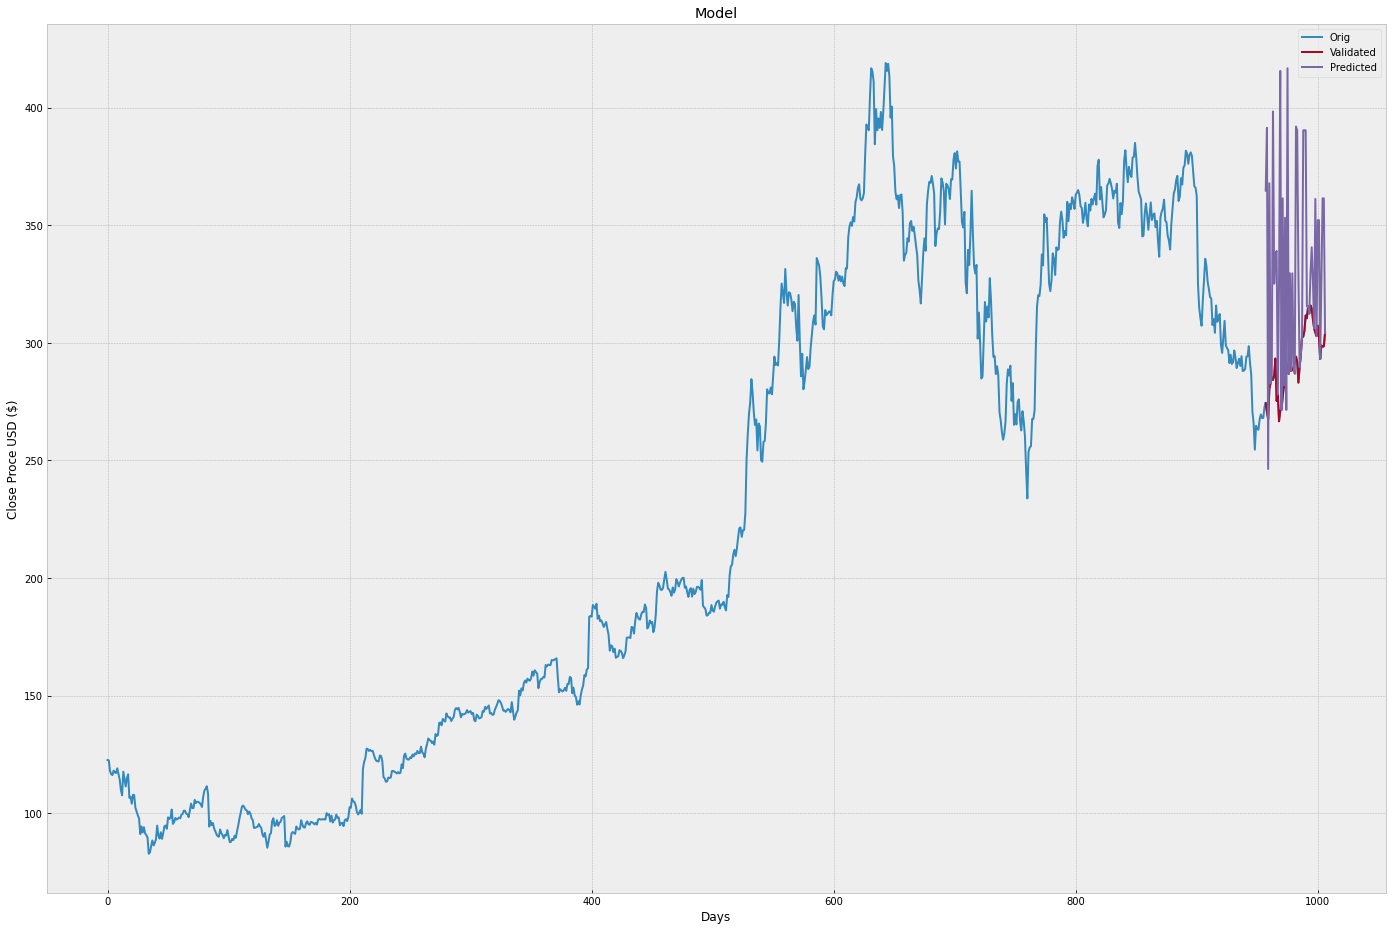

In [88]:
plt.figure(figsize = (24,16))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Proce USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Validated', 'Predicted'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


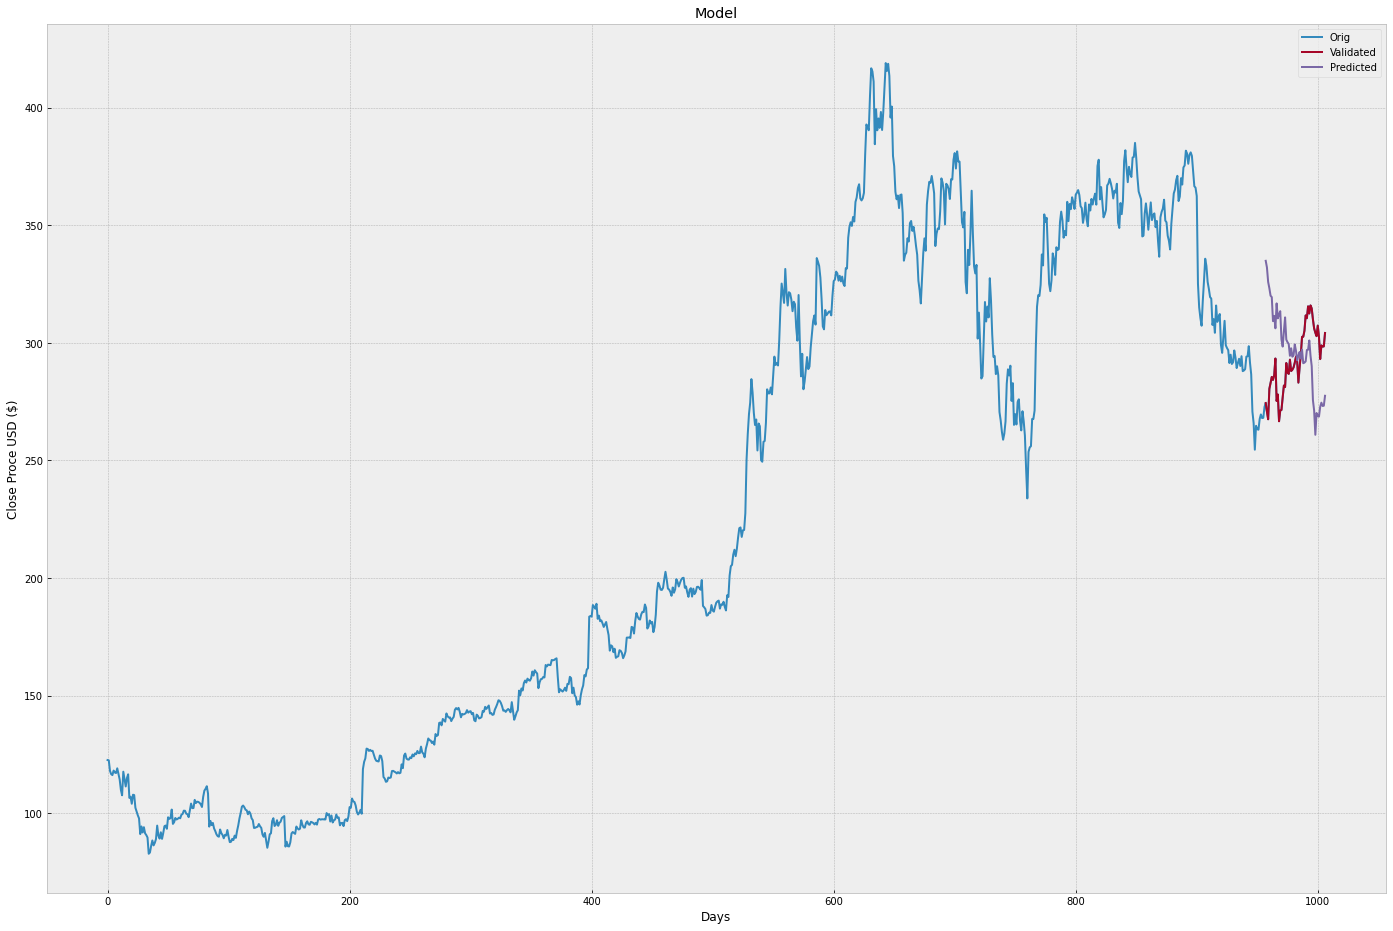

In [89]:
# Let us visialize the obtained solutions

predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (24,16))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Proce USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Validated', 'Predicted'])
